# Principal Component Analysis (PCA) - An Overview

Now, let's put all the pieces together to understand how Principal Component Analysis (PCA) works.

Recall our goal: to take a dataset and project it onto a line (or a lower-dimensional plane) that preserves the most information. We learned that the "best" line is the one that **maximizes the variance** (the spread) of the projected data.

The big question is: **How do we find this best line?**

This is where all the concepts we've been studying—projections, eigenvectors, and the covariance matrix—come together in a clever way.

---

## The PCA Algorithm

Here are the high-level steps for performing PCA on a 2D dataset.

### Step 1: Center the Data
First, we calculate the mean of our dataset and shift the data so that its center is at the origin (0, 0).

### Step 2: Calculate the Covariance Matrix
Next, we calculate the **covariance matrix** for our centered data. This 2x2 matrix, `C`, compactly represents the spread (variance) and relationship (covariance) between our two features.

Suppose for our data, we calculate the following covariance matrix:  

$
C = \begin{bmatrix}
9 & 4 \\
4 & 3
\end{bmatrix}
$

### Step 3: Find the Eigenvectors and Eigenvalues of the Covariance Matrix
This is the most important leap in the process. The eigenvectors of the covariance matrix point in the directions of maximum variance in the data. The corresponding eigenvalues tell us how *much* variance is in each of those directions.

For our covariance matrix `C`, we would find:
* **Eigenvector 1:** $v_1 = \begin{bmatrix} 2 \\ 1 \end{bmatrix}$ with **Eigenvalue 1:** $\lambda_1 = 11$

* **Eigenvector 2:** $v_2 = \begin{bmatrix} -1 \\ 2 \end{bmatrix}$ with **Eigenvalue 2:** $\lambda_2 = 1$

### Step 4: Select the Principal Component
The eigenvector with the **largest eigenvalue** is the direction that captures the most variance. This is our **first principal component**.

In our case, $\lambda_1 = 11$ is much larger than $\lambda_2 = 1$, so our principal component is the direction defined by the eigenvector $v_1 = \begin{bmatrix} 2 \\ 1 \end{bmatrix}$. This is the "best line" we've been looking for. We can discard the second eigenvector.

### Step 5: Project the Data
The final step is to project our original data onto the line spanned by our chosen principal component. The result is a new, 1-dimensional dataset that has preserved the maximum possible variance.

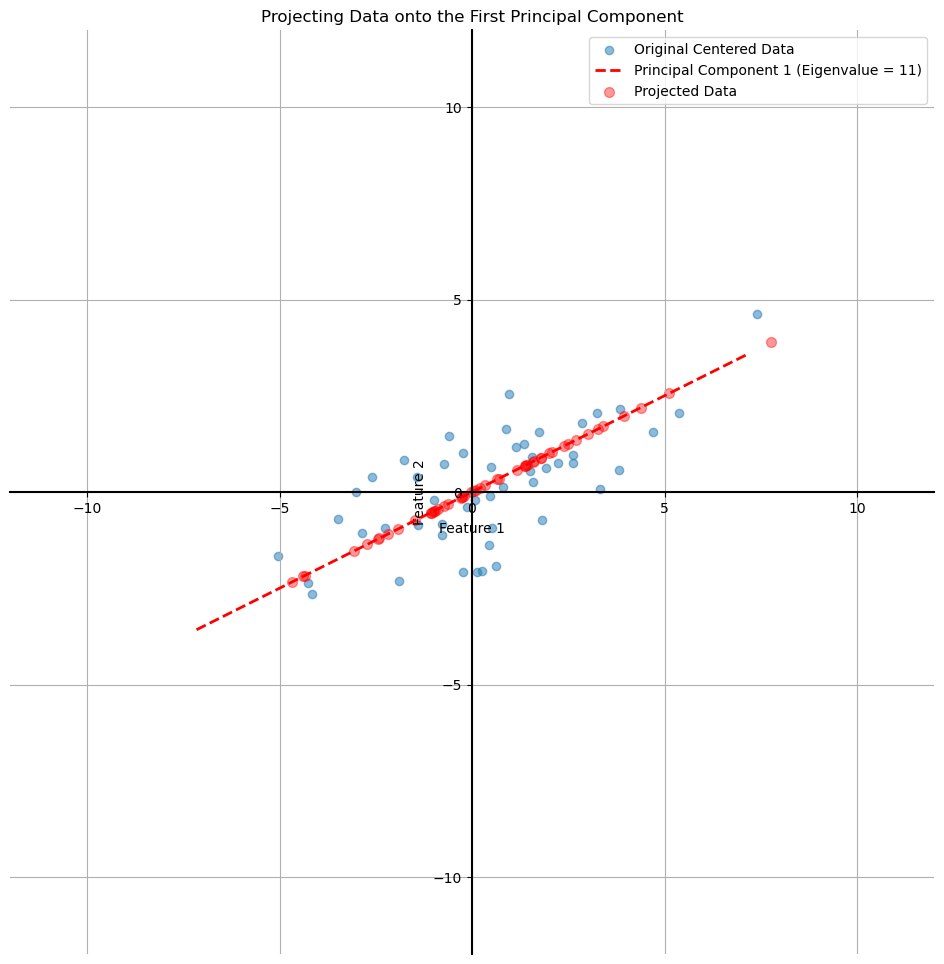

In [6]:
# --- A Note on the Code in This Section ---
# The Python code in these notebooks serves one purpose: to generate the visualizations
# that illustrate the mathematical concepts. You do not need to understand the code
# itself to learn the theory.

import numpy as np
import matplotlib.pyplot as plt

# --- Generate the same correlated 2D data as the previous lesson ---
np.random.seed(42)
cov_matrix = [[9, 4], [4, 3]] # Use the values from the lesson
data_2d = np.random.multivariate_normal([0, 0], cov_matrix, 50)

# --- Find the eigenvalues and eigenvectors of the covariance matrix ---
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
# The eigenvectors are the columns of the resulting matrix. Let's get the first one.
v1 = eigenvectors[:, 0]

# --- Project the data onto the first principal component ---
# 1. Normalize the eigenvector to get a unit vector
v1_unit = v1 / np.linalg.norm(v1)
# 2. Project the data
projected_data = (data_2d @ v1_unit).reshape(-1, 1) * v1_unit.reshape(1, -1)


# --- Create the plot ---
plt.figure(figsize=(12, 12))

# Plot the original centered data points
plt.scatter(data_2d[:, 0], data_2d[:, 1], alpha=0.5, label='Original Centered Data')

# Plot the principal component line
# We draw a long line in the direction of the eigenvector
plt.plot([-v1[0]*8, v1[0]*8], [-v1[1]*8, v1[1]*8], 'r--', linewidth=2,
         label=f'Principal Component 1 (Eigenvalue = {eigenvalues[0]:.0f})')

# Plot the projected data points
plt.scatter(projected_data[:, 0], projected_data[:, 1], c='red', s=50, alpha=0.4,
            label='Projected Data')

# --- Format the plot ---
plt.xlim(-12, 12)
plt.ylim(-12, 12)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Projecting Data onto the First Principal Component')
plt.grid(True)
plt.legend()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

---

## PCA for a High-Dimensional Dataset

This process works for datasets of any size. Imagine you have a dataset with 9 features (a 9-dimensional dataset).

1.  **Calculate the 9x9 Covariance Matrix.**
2.  **Find the 9 Eigenvalues and their corresponding Eigenvectors.**
3.  **Sort the eigenvectors** by their eigenvalues, from largest to smallest.
4.  **Choose the top *k* eigenvectors.** If you want to reduce your dataset to 2 dimensions, you keep the two eigenvectors with the two largest eigenvalues and discard the rest.
5.  **Project the data.** Create a new matrix `V` where the columns are your chosen eigenvectors (normalized to have a length of 1). The final, reduced dataset is calculated as `A_projected = A_original · V`.

The result is a new dataset with the same number of rows but only *k* columns, having lost as little information as possible.